## EDA with Seaborn

In [1]:
# This exercise is an attempt to do data visulization with Seaborn
# We will explore first the Univariate Analysis 
# Later we will do bi-variate analysis

In [80]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import scipy.stats
# Setting theme for seaborn
sns.set_theme(style="darkgrid")
from matplotlib.pyplot import figure, show

In [3]:
# Wine data
wine = pd.read_csv("winemag-data_first150k.csv",index_col=False)

In [4]:
# Columns from Wine Data
wine.columns

Index(['Unnamed: 0', 'country', 'description', 'designation', 'points',
       'price', 'province', 'region_1', 'region_2', 'variety', 'winery'],
      dtype='object')

In [5]:
# Remove the columns that is not needed
wine.drop(columns={'Unnamed: 0'}, inplace=True)

In [6]:
# Looking at the data
wine.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [7]:
# Summary stats
wine.describe()

,points,price
count,150930.000000,137235.000000
mean,87.888418,33.131482
std,3.222392,36.322536
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,24.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


In [8]:
# Let's look at the info
print(wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 11.5+ MB
None


In [9]:
# Let's look at dimension 
print("Number of rows : " , wine.shape[0])
print("Number of columns :" , wine.shape[1])

Number of rows :  150930
Number of columns : 10


In [10]:
# We can also count the number of NaN for the below.

(wine.isna().sum()/len(wine))*100

country         0.003313
description     0.000000
designation    30.302127
points          0.000000
price           9.073743
province        0.003313
region_1       16.603724
region_2       59.615053
variety         0.000000
winery          0.000000
dtype: float64

In [11]:
# Looking at the unique values for below columns
# region_1, region_2, country, variety, winery, and points

In [12]:
wine['country'].nunique()

48

In [13]:
# Identify the number of unique values against the total length 
# Remove anything that has above 10 %
list_of_columns = ['country','points','region_1','region_2','designation','winery']

for i in list_of_columns:
    print(i,(wine[i].nunique()/len(wine))*100)

country 0.031802822500496916
points 0.013913734843967402
region_1 0.8189226793877957
region_2 0.011926058437686345
designation 20.28821307891075
winery 9.812495859007486


In [14]:
# Dropping "designation" since it has 20 % unique values
wine.drop(columns={'designation'},inplace=True)

In [15]:
# Replacing NaN country with mode
wine['country'] = wine['country'].fillna(wine['country'].mode()[0])

In [16]:
# We can remove duplciates based on all values

wine.drop_duplicates(inplace=True)

### Done with EDA ... 
### Some Feature Engineering

In [17]:
wine.head()

,country,description,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [18]:
# We will explore the relationship between price and points first
# Price will be our target variable and points as feature
wine_1 = wine[['price','points']]

In [22]:
# We have lots of blank price in the dataframe
# we will remove the price as blanks from the analysis

In [25]:
wine_1.dropna(subset=['price'],inplace=True)

<ipython-input-25-8dbf524352f3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_1.dropna(subset=['price'],inplace=True)


In [27]:
from sklearn import preprocessing

In [29]:
wine_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89131 entries, 0 to 149639
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   89131 non-null  float64
 1   points  89131 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 2.0 MB


<h2><p><center> <font color="blue">Linear Regression </font></center> <p> </h2>
<p><center> 
    
The Simplest and probably oldest form of regression. This is a part of Supervised Algorithm to 
find relationship between a "numeric" dependent / target variable and (in this case) a "numeric"                   independent / feature variable.  

There are a quite lot of assumptions made in Linear Regression but before going there we will see how it looks in the mathematical form.
    
    
    
</center><p>

<font color='magenta'><h3>$$ Y = \beta_0 + \beta_1*x $$</h3></font>

<center><b>Y : Dependent / Target / Label</b></center><br>
<b>$${\beta_0}:  Intercept $$</b><br>
$${\beta_1}:  Slope$$<br>
<center><b>x : Inependent /Feature Variable</center></b>

Before diving deeper. Let's look at the <b> Scatterplot </b> between Price and Points

<ipython-input-65-526bcb0da562>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_1["points"] = pd.to_numeric(wine_1["points"], downcast='float')


<AxesSubplot:xlabel='price', ylabel='points'>

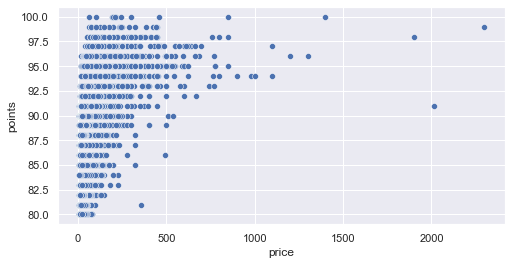

In [65]:
wine_1["points"] = pd.to_numeric(wine_1["points"], downcast='float')

plt.figure(figsize=(8,4))
sns.scatterplot(data=wine_1, x="price",y="points")

<p>Looking at the scatterplot it seems like there are few wines where following characteristics are happening</p>

<ol>
    <li> Lower Points But Higher Price </li>
    <li> Higher Points But Lower Value </li>
</ol>




<Figure size 864x720 with 0 Axes>

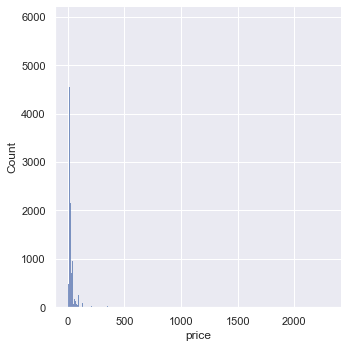

In [72]:
# Let's look at the distribution of each variable
# First we will start with "Price"
plt.figure(figsize=(12,10))
sns.displot(data=wine_1,x=wine_1['price'])
plt.show()

In [79]:
# The above plot seems highly skewed 
# We can also check the skewness of data with scipy.stats models

scipy.stats.skew(wine_1['price'])

12.869948267703828

<Figure size 864x720 with 0 Axes>

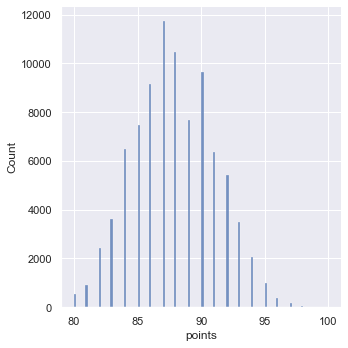

In [82]:
# Let's do the same for our independent variables

plt.figure(figsize=(12,10))
sns.displot(data=wine_1,x=wine_1['points'])
plt.show()

In [83]:
# Let's check the skewness

scipy.stats.skew(wine_1['points'])

0.11788365989923477

<p> Since the skewness is close to 0, hence we will not perform any transformation. 
    Remember, we had huge skew for <b> Price </b> but its a Target Variable 
    </p>

<p> We will also look at the <b> Correlation Coefficeint </b> to learn more about the linear relationship </p>
<p> For this example we will look at <b> Pearson's Correlation Coefficient</b>. Coefficient of -1 and +1 signify strict linear relationship, however any value between -1 and +1 may mean strength of relationship is weak. 
    Coefficient of 0 means no linear relationship</p>
<p> It is important to note that Correlation Coefficinet provides both <b>Strength</b> and <b>Direction</b> of relationship. +1 means with increase in x , y also increases, while -1 means with increase in x , y decreases and vice versa </p>

<h3><p><font color="blue">Correlation provides Direction and Strength, while Covariance provides only Direction </font><p></h3>

<p> We will be using Pearson Correlation to identify the correaltion between these two variables.
Following are the assumptions of Pearson Correlation.

<ol>
    <li>Assumption 1 : Both variables should be interval or ratio scale . [Check] </li>
    <li>Assumption 2 : There is a linear relationship between these two variables. [sort of check] </li>
    <li>Assumption 3 : There should not be any outliers [probably]. Let's check below. </li>
    <li>Assumption 4 : The variables should be approximately normally distributed. </li>
</ol>
</p>

In [127]:
# Checking Assumption 1 for interval or ratio scale
wine_1.dtypes

price     float64
points    float32
dtype: object

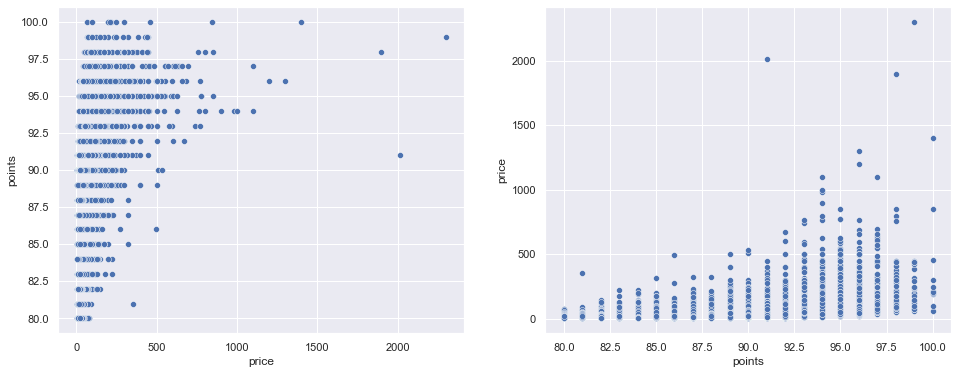

In [133]:
# Checking Assumption 2 through scatterplot

fig, axes = plt.subplots(ncols=2,figsize=(16,6))
sns.scatterplot(data=wine_1,x='price',y='points', ax=axes[0])
sns.scatterplot(data=wine_1,x='points',y='price',ax=axes[1])
plt.show()

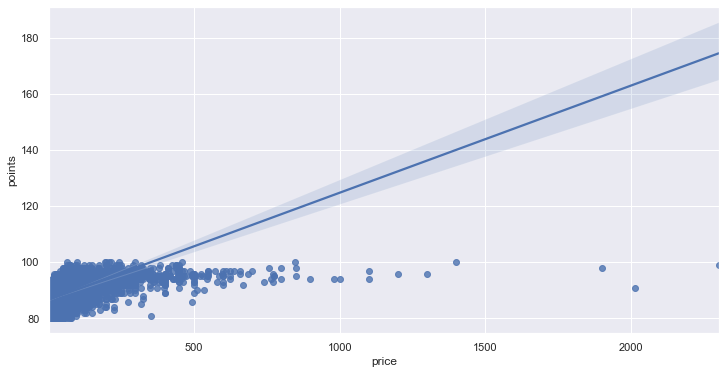

In [136]:
plt.figure(figsize=(12,6))
sns.regplot(data=wine_1,x='price',y='points')
plt.show()

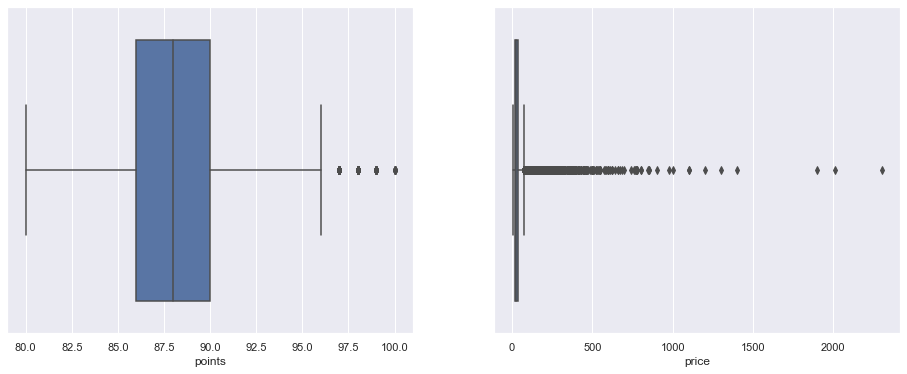

In [118]:
# Checking Assumption 3
# Assumption 3 through boxplots
fig, axes = plt.subplots(ncols=2,figsize=(16,6))
sns.boxplot(data=wine_1,x='points', ax=axes[0])
sns.boxplot(data=wine_1,x='price',ax=axes[1])
plt.show()

In [103]:
# We can remove outliers through Z Scores
# Assuming any value having Z Score Above 3 will give us comfort to remove it

from scipy import stats

Z_SCORE = np.abs(scipy.stats.zscore(wine_1))

print(Z_SCORE)

[[5.34487347 2.52365125]
 [2.0265803  2.52365125]
 [1.4956534  2.52365125]
 ...
 [0.73423961 1.20053477]
 [0.65460057 1.20053477]
 [0.68114692 1.20053477]]


In [106]:
# We will set the threshold to 3 for both variables

Threshold = 3

np.where(Z_SCORE>3)

(array([    0,    14,    16, ..., 88699, 88810, 88861]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [108]:
# Let's remove the outliers 
# We will create a new data frame for it.

wine_1_outlier_removed = wine_1[(Z_SCORE < 3).all(axis=1)]

In [112]:
# Let's compare the size of data frame before outlier removed and after

print(wine_1.shape)

print(wine_1_outlier_removed.shape)

# Number of observations removed

print("Number of obs removed: " , wine_1.shape[0] - wine_1_outlier_removed.shape[0])

(89131, 2)
(88011, 2)
Number of obs removed:  1120


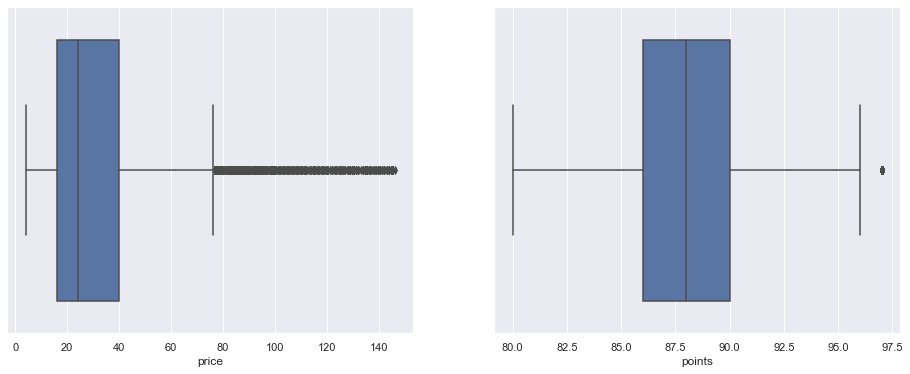

In [119]:
# Let's redraw the boxplots to check the outliers

fig, axs = plt.subplots(ncols=2, figsize=(16,6))
sns.boxplot(data=wine_1_outlier_removed,x='price', ax=axs[0])
sns.boxplot(data=wine_1_outlier_removed,x='points',ax=axs[1])
plt.show()

In [120]:
# We have satisfied Assumption 1,2, and 3 .
# Now we will check the assumption of normality for both variables

# We will use Shapiro Test from scipy to do this for us

scipy.stats.shapiro(wine_1_outlier_removed['price'])

/Users/bt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.8241843581199646, pvalue=0.0)

In [121]:
scipy.stats.shapiro(wine_1_outlier_removed['points'])

/Users/bt/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.987952470779419, pvalue=0.0)

In [ ]:
# As you can see , we are getting error since the data size is big. 
# let's do some visual test
# First : Histogram

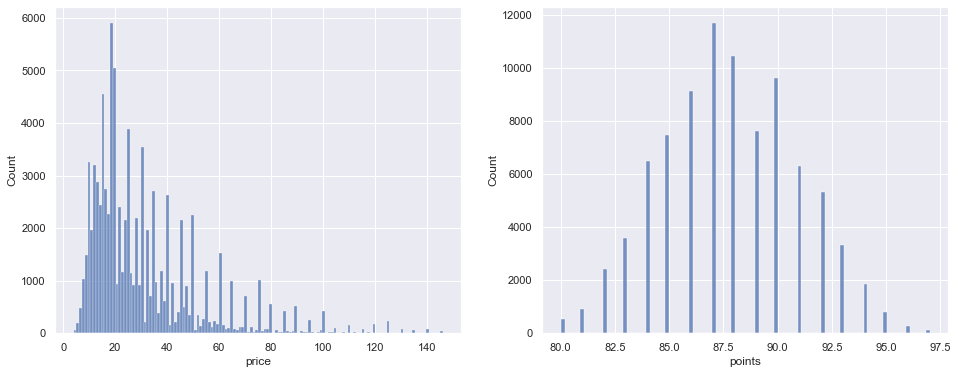

In [125]:
fig, axes = plt.subplots(ncols=2, figsize=(16,6))
sns.histplot(data=wine_1_outlier_removed,x='price',ax=axes[0])
sns.histplot(data=wine_1_outlier_removed,x='points',ax=axes[1])
plt.show()

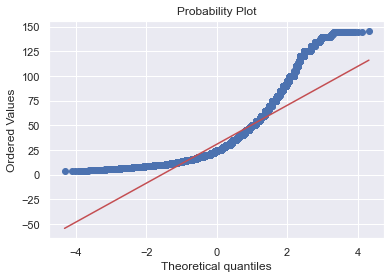

In [162]:
# Let's also check the QQ Plot

from scipy import stats
import pylab

stats.probplot(wine_1_outlier_removed['price'], dist="norm", plot=pylab)
plt.show()

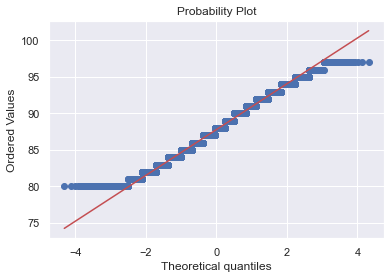

In [164]:
stats.probplot(wine_1_outlier_removed['points'], dist="norm", plot=pylab)
plt.show()

In [169]:
wine_1_outlier_removed['price_log'] = np.log(wine_1_outlier_removed['price'])

<ipython-input-169-b776ee5229ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wine_1_outlier_removed['price_log'] = np.log(wine_1_outlier_removed['price'])


In [170]:
wine_1_outlier_removed.head()

,price,points,price_log
1,110.0,96.0,4.700480
2,90.0,96.0,4.499810
3,65.0,96.0,4.174387
4,66.0,95.0,4.189655
5,73.0,95.0,4.290459


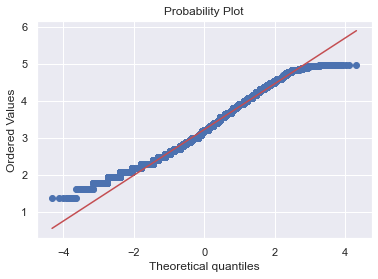

In [175]:
# Let's look at the QQ Plot for the Log transformed of Price

stats.probplot(wine_1_outlier_removed['price_log'],dist="norm",plot=pylab)
plt.show()

In [177]:
from scipy.stats import normaltest

stats, p = normaltest(wine_1_outlier_removed['price'])

In [178]:
stats

31867.21157926148

In [179]:
p

0.0

In [180]:
stats, p = normaltest(wine_1_outlier_removed['price_log'])

In [181]:
stats

2423.492534935002

In [182]:
p

0.0

In [183]:
from scipy.stats import anderson 

In [184]:
result = anderson(wine_1_outlier_removed['price'])

In [224]:
p = 0

for i in range(len(result.critical_values)):
    
    sl , cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < result.critical_values[i]:
        print('%.3f : %.3f data looks normal (fail to reject H0)' %(sl,cv))
    else:
        print('%.3f : %.3f data does not look normal (reject H0)' %(sl,cv))


15.000 : 0.576 data does not look normal (reject H0)
10.000 : 0.656 data does not look normal (reject H0)
5.000 : 0.787 data does not look normal (reject H0)
2.500 : 0.918 data does not look normal (reject H0)
1.000 : 1.092 data does not look normal (reject H0)


In [344]:
# We will first train the model using train test split
# In the first step , we will create train and test datasets
# In the second step, we will create validation from test data set


from sklearn.model_selection import train_test_split

# We will first do linear regression through statsmodel

import statsmodels.api as sm



In [408]:
X = wine_1_outlier_removed['points']
y = wine_1_outlier_removed['price']

In [409]:
# Create train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, shuffle=True)

In [410]:
# Create train and val dataset
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

In [411]:
# We will normalize only the X_train and y_train instead of doing it for all the test and validation

X_train = ((X_train - X_train.min())/ (X_train.max()-X_train.min()))

y_train = ((y_train-y_train.min()) / (y_train.max()-y_train.min()))

X_train = X_train.to_frame(name='POINTS')

y_train = y_train.to_frame('PRICE')

# Adding constant to the X_train

X_train = sm.add_constant(X_train)

In [415]:
model = sm.OLS(y_train,X_train).fit()

In [416]:
y_pred = model.predict(X_train)

In [417]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                 1.728e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        21:48:53   Log-Likelihood:                 25578.
No. Observations:               39604   AIC:                        -5.115e+04
Df Residuals:                   39602   BIC:                        -5.114e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0191      0.002    -11.229      0.0

In [418]:
# As we can see Adjusted R Square value is ~ 0.29 and we can formally say that the model is able to explain 
# only 30 % of variablity in Price Explained by Points. This is a goodness of fit test. We can also use R Square
# instead of Adjusted R Square since there is only one independent variable.

$$ R^2 = 1 - (RSS \div TSS) $$

<p> RSS : Variability left unexplained after performing regression. It's basically <b>Sum of Squares of Residual.</b></p>
<p> TSS : It's the addition of "Explained Sum of Sqaures" and "Residual Sum of Sqaure" (the RSS). It is <b>"sum of square of difference between mean and the observed variable" </b>. </p>

In [419]:
# Get the fitted value from the model

model_fitted_y = model.fittedvalues

# Residuals from the model

model_residual = model.resid

# Normalizing the residuals 

model_residual_normalized = model.get_influence().resid_studentized_internal

# Absolute normalized residuals

model_norm_residuals_absolute = np.sqrt(np.abs(model_residual_normalized))

#residuals in absolute terms

model_residual_abs = np.abs(model_residual)

#leverage from the model

model_leverage = model.get_influence().hat_matrix_diag

# Cooks distance

model_cooks = model.get_influence().cooks_distance[0]



<p> <h4> Residual Plot </h4> </p>

<p> Residual plot shows us the scatter plot of residuals against fitted values. We shouln't find any pattern here </p>

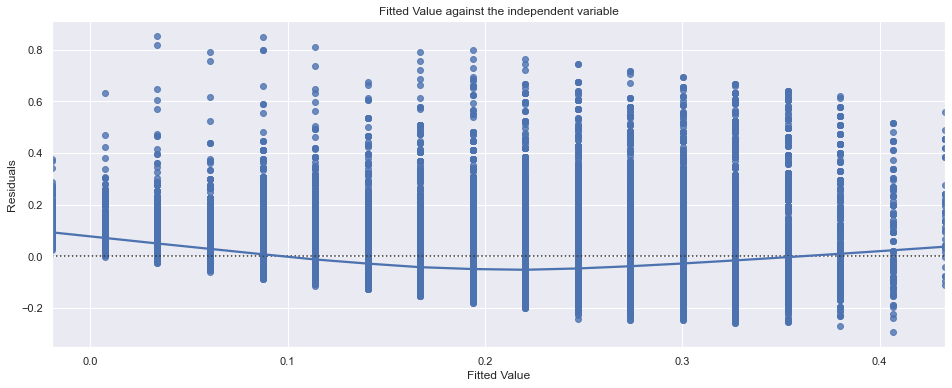

In [420]:
plt.figure(figsize=(16,6))
sns.residplot(data=X_train,x=model_fitted_y,y=model_residual, lowess=True)
plt.title("Fitted Value against the independent variable")
plt.xlabel("Fitted Value")
plt.ylabel("Residuals")
plt.show()

In [421]:
# Not terribly good but not bad as well

<p><h4> QQ Plot </h4></p>

<p> One of the main feature we want to look at the distribution on Residuals. It should follow <b> Normal Distribution </b> </p>

In [422]:
from statsmodels.graphics.gofplots import ProbPlot

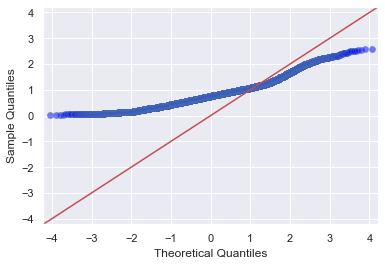

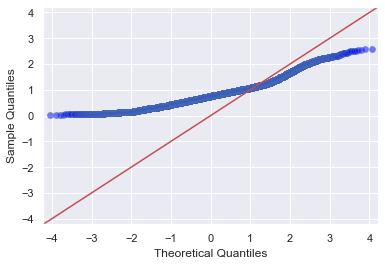

In [423]:
qq = ProbPlot(model_norm_residuals_absolute)

qq.qqplot(line='45', alpha=0.5, color='#4C72B0', lw=1)

In [424]:
# To be honest , I am having doubts on the model. Seems like the residuals are alomst out of any normal space.

In [425]:
# For the sake of completeness , let's complete two more plots and then identify why our linear regression is 
# not working well

<p> <h4> Scale Location Plot </h4></p>

<p> This plot is also used to identify the spread of residuals. Also used to assess <b> heteroscedasticity </b>. I for the love of stats can not pronounce it and neither should you. </p>

<p> The assumption of linear regression is that there is no "hetro" thing in your model. simply said, if we draw our residuals on a plot against fitted value then there should not be any fan type picture. </p>

/Users/bt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


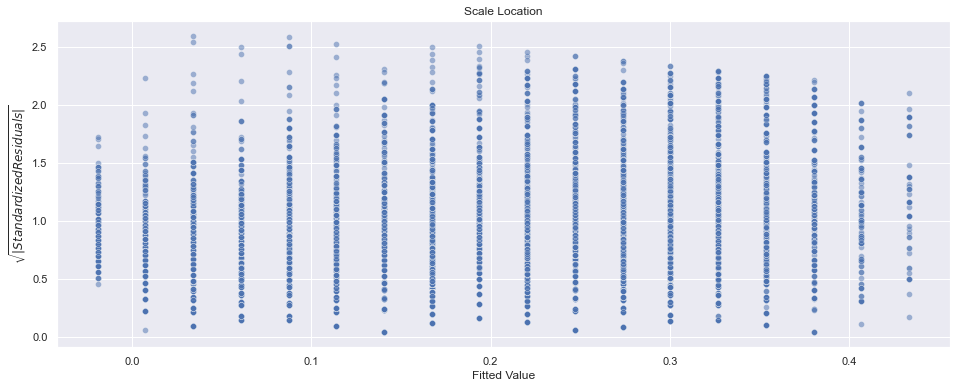

In [426]:
plt.figure(figsize=(16,6))
sns.scatterplot(model_fitted_y,model_norm_residuals_absolute, alpha=0.5)
plt.title("Scale Location")
plt.xlabel("Fitted Value")
plt.ylabel('$\sqrt{|Standardized Residuals|}$')
plt.show()

In [427]:
# Promise that its the last plot you will build.

<p> <h4> Leverage Plot </h4> </p>

<p> This plot shows if the outliers in our datasets have any influence over regression fit </p>

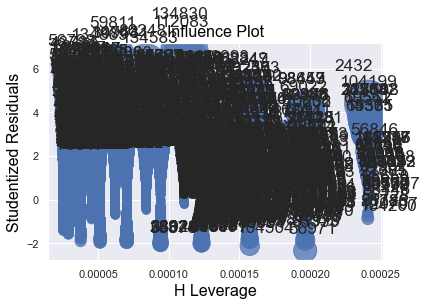

<Figure size 1152x576 with 0 Axes>

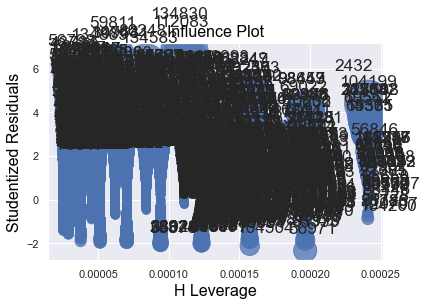

In [428]:
plt.figure(figsize=(16,8))
sm.graphics.influence_plot(model)

In [429]:
# Pretty hideous 

/Users/bt/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


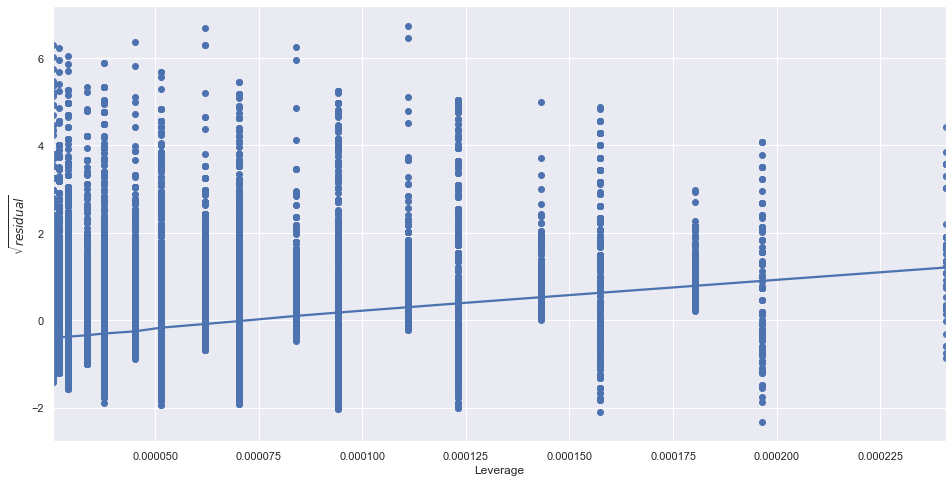

In [430]:
plt.figure(figsize=(16,8))
plt.scatter(model_leverage,model_residual_normalized)
sns.regplot(model_leverage,model_residual_normalized, scatter=False, ci=False, lowess=True)
plt.xlabel("Leverage")
plt.ylabel('$\sqrt{residual}$')
plt.show()

In [434]:
# MSE of the model

np.sqrt(model.mse_model)

16.67244517547374

In [436]:
import tensorflow as tf

In [437]:
from tensorflow import keras

In [438]:
from sklearn.compose import make_column_selector